In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import RELACS as rel
import os
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


0 0
-0.27313540238381995
0 1
-0.058937376636202854
0 2
0.06817150264157928
0 3
-0.8073549220576041
0 4
0.0929906738306925
0 5
1.8275556352415794
0 6
0.19086608709230782
1 0
0.3097584920568697
1 1
0.018738724719766786
1 2
0.13750352374993496
1 3
-0.5873702701224762
1 4
0.27635578433162783
1 5
1.9686020324279192
1 6
0.3644114262088758
2 0
-0.11547721741993605
2 1
-0.37851162325372967
2 2
-0.27753397552890874
2 3
-1.0
2 4
-0.20163386116965043
2 5
1.6780719051126376
2 6
-0.02553509210713778
3 0
0.24160229984384984
3 1
-0.007777350591719245
3 2
0.051368391090404406
3 3
-0.8853574340588771
3 4
0.022367813028454364
3 5
1.9387005759511633
3 6
0.3263524386007815
4 0
0.2630344058337938
4 1
-0.30337229555776324
4 2
-0.012685259631115331
4 3
-0.7892292332526047
4 4
-0.30408349912421806
4 5
2.232043110068533
4 6
0.33086121965737014
5 0
0.3479233034203069
5 1
0.1087356395408805
5 2
-0.3801427088326581
5 3
-0.9668331360648007
5 4
-0.3359741931966933
5 5
2.321928094887362
5 6
0.33342373372519196
6 0
0

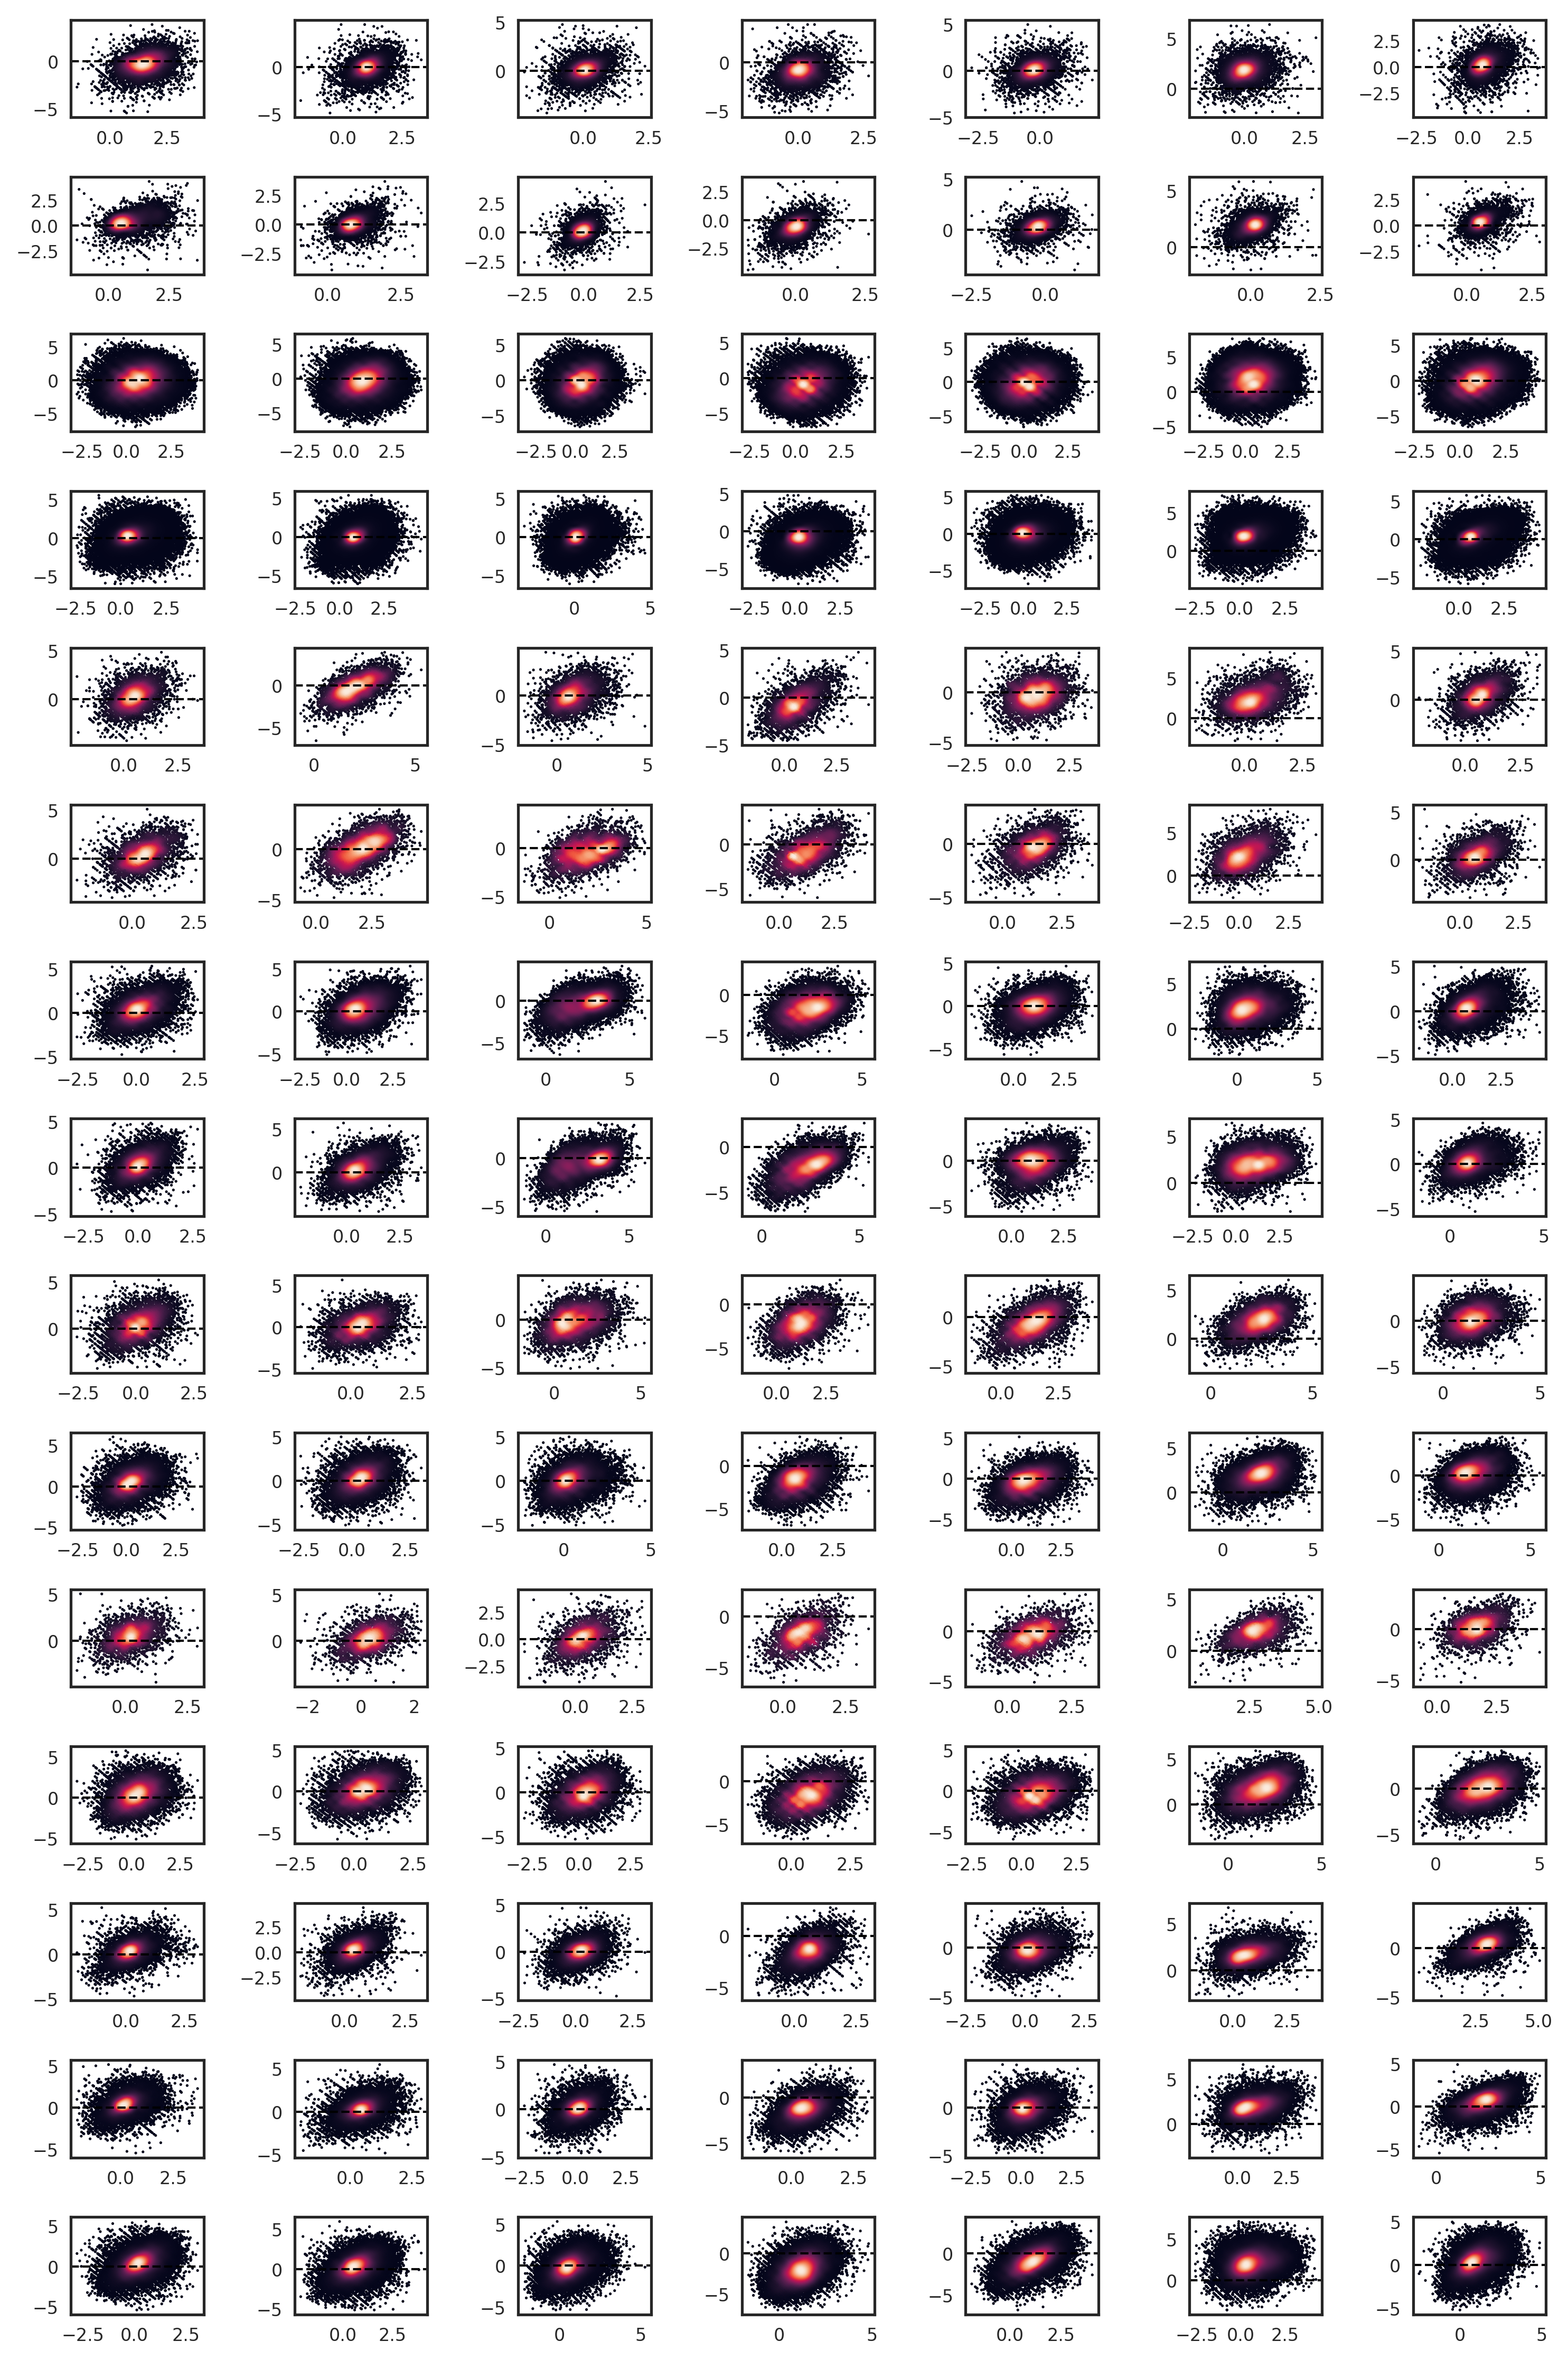

In [41]:
fig,ax = plt.subplots(15,7, dpi=300, figsize=(10,15))
states = ["E{}".format(i) for i in range(1,16)]

marks = ["H3K9me3","H3K27me3","H3K4me3","H3K27ac","H3K4me1","H3K79me2","H3K36me3"]

for state_idx in range(len(states)):
    for mark_idx in range(len(marks)):
        print(state_idx,mark_idx)
        counts_ = pd.read_csv("/home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/downstream_analysis/Global_Changes_on_chrom_states/counts/{}/{}_NPC48h_vs_mESC_E1.counts".format(states[state_idx],marks[mark_idx]), sep="\t")
        counts = rel.preprocess_deeptools(counts_, merge_rep=True, list_of_columns=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15]])
        counts_norm = rel.Normalize_T(counts)
        rel.MA_samp(counts_norm, ["'mESC_DMSO_rep1_{}_merged.filtered'+'mESC_DMSO_rep2_{}_merged.filtered'".format(marks[mark_idx],marks[mark_idx]), "'iNPC_DMSO_rep1_{}_merged.filtered'+'iNPC_DMSO_rep2_{}_merged.filtered'".format(marks[mark_idx],marks[mark_idx])], ax=ax[state_idx][mark_idx])

plt.tight_layout()        
plt.savefig("../FIGURES/AllStates_mESC_AllMarks.png")